## ***Análisis exploratorio y preparación de datos para clasificación de tumores cancerígenos.***

Este notebook presenta un análisis exploratorio aplicado a un conjunto de datos de diagnóstico de cáncer de mama. El objetivo principal es entender la estructura del dataset, identificar patrones relevantes y preparar adecuadamente las variables para una futura tarea de clasificación (benigno vs maligno).

A lo largo del análisis:

- Exploraremos la distribución de las clases.
- Analizaremos el comportamiento estadístico de las características.
- Evaluaremos la necesidad de aplicar técnicas como normalización o estandarización.
- Visualizaremos las relaciones entre variables para detectar posibles redundancias o correlaciones fuertes.
- Limpiaremos datos irrelevantes o redundantes sin realizar aún una selección formal de características.

Este proceso busca no solo preparar los datos para modelos de machine learning, sino también demostrar un enfoque riguroso y ordenado para abordar problemas reales de análisis de datos.



## ***Importación de las librerías***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

## ***Lectura y análisis de los datos.***


In [2]:
#Lectura de nuestro dataset.
import os

ruta = "data.csv"
if os.path.exists(ruta):
    print("Archivo encontrado.")
    df = pd.read_csv(ruta)
else:
    print("Archivo no encontrado.")

Archivo encontrado.


In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## ***Contenido de los datos.***

- **ID number**
- **Diagnosis** (M = malignant, B = benign)
- **radius**: promedio de distancias desde el centro a los puntos del perímetro  
- **texture**: desviación estándar de los valores en escala de grises  
- **perimeter**
- **area**
- **smoothness**: variación local en las longitudes del radio  
- **compactness**: perimeter² / area - 1.0  
- **concavity**: intensidad de las porciones cóncavas del contorno  
- **concave points**: número de porciones cóncavas del contorno  
- **symmetry**
- **fractal dimension**: "aproximación de la línea costera" - 1

Se calcularon el **mean**, **standard error (SE)** y el **worst** o mayor valor (promedio de los tres mayores)  
para cada una de estas características, resultando en **30 variables** en total.

Por ejemplo:  
- Campo 3 = `radius_mean`  
- Campo 13 = `radius_se`  
- Campo 23 = `radius_worst`


**Valores faltantes**: ninguno  
**Distribución de clases**: 357 benignos, 212 malignos


In [6]:
# Eliminamos las características innecesarias: 'id' no aporta valor para la clasificación,
# 'Unnamed: 32' contiene valores nulos y no se necesita. 
# Importante: esto no es una selección de características, solo una limpieza preliminar del dataset.

col = df.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [7]:
#Separamos nuestras etiquetas en una variable y eliminamos las columnas innecesarias.

y = df.diagnosis #M o B
print(f"Clases: {y.unique()} \n")
list = ["Unnamed: 32" , "id", "diagnosis"]

x = df.drop (list, axis = 1)

x.head(5)

Clases: ['M' 'B'] 



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Número de casos benignos: 357
Número de casos malignos: 212


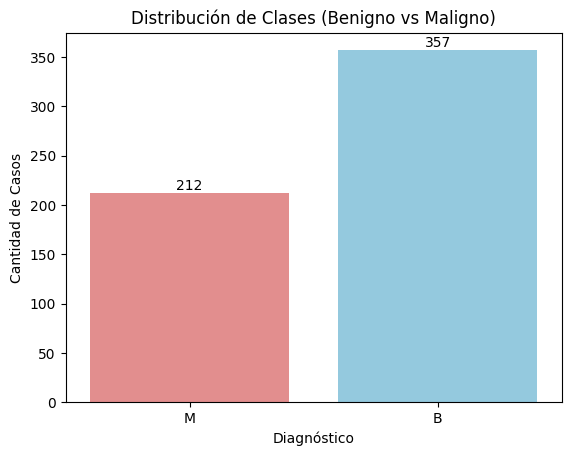

In [8]:
# Gráfico de barras vertical del conteo de clases
colores = {'B': 'skyblue', 'M': 'lightcoral'}
ax = sns.countplot(x=y, label="Count", palette = colores) 

# Obtenemos los valores de clases
B, M = y.value_counts()

# Mostrar conteos en consola para información directa.
print("Número de casos benignos:", B)
print("Número de casos malignos:", M)

# Mostrar el gráfico
plt.title("Distribución de Clases (Benigno vs Maligno)")
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad de Casos")

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count),
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10)

plt.show()

### ***Exploración inicial de las características***

Ahora que tenemos las variables, surge una pregunta natural: ¿qué significan realmente estas características?  
Aunque en muchos casos no es imprescindible comprender su significado exacto para construir modelos de machine learning, es útil tener una idea general de su comportamiento estadístico: varianza, desviación estándar, cantidad de muestras, valores máximos y mínimos, etc.

Este tipo de información nos ayuda a contextualizar mejor el dataset y a tomar decisiones informadas en etapas posteriores como la visualización, selección de variables, extracción de características o clasificación.

Por ejemplo, notar que `area_mean` tiene un valor máximo cercano a 2500, mientras que `smoothness_mean` apenas supera 0.16, nos lleva a preguntarnos si será necesario aplicar técnicas de **normalización o estandarización** de los datos. 

La respuesta no es absoluta: depende del modelo, del análisis y del contexto. Por eso, avanzaremos paso a paso, comenzando por una visualización exploratoria de los datos.


## ***Visualización y selección de características***

En este proyecto nos enfocamos en comprender las características del dataset mediante técnicas de visualización y selección de variables, con el fin de preparar los datos para una futura clasificación.

A lo largo del análisis, se aplican distintos métodos de selección de características como:
- Correlación
- Selección univariada
- Eliminación recursiva de características (RFE), con y sin validación cruzada
- Métodos basados en árboles usando Random Forest
- Análisis de Componentes Principales (PCA) para reducción de dimensionalidad

Antes de aplicar estas técnicas, realizamos una exploración estadística y gráfica para familiarizarnos con el comportamiento de los datos. No se trata aún de elegir variables finales, sino de conocer la información disponible, como si estuviéramos leyendo la carta antes de pedir en un bar.

Además, utilizamos visualizaciones como *violin plots* y *swarm plots* para observar la distribución de las variables, lo cual requiere normalizar o estandarizar previamente, debido a las grandes diferencias de escala entre características.


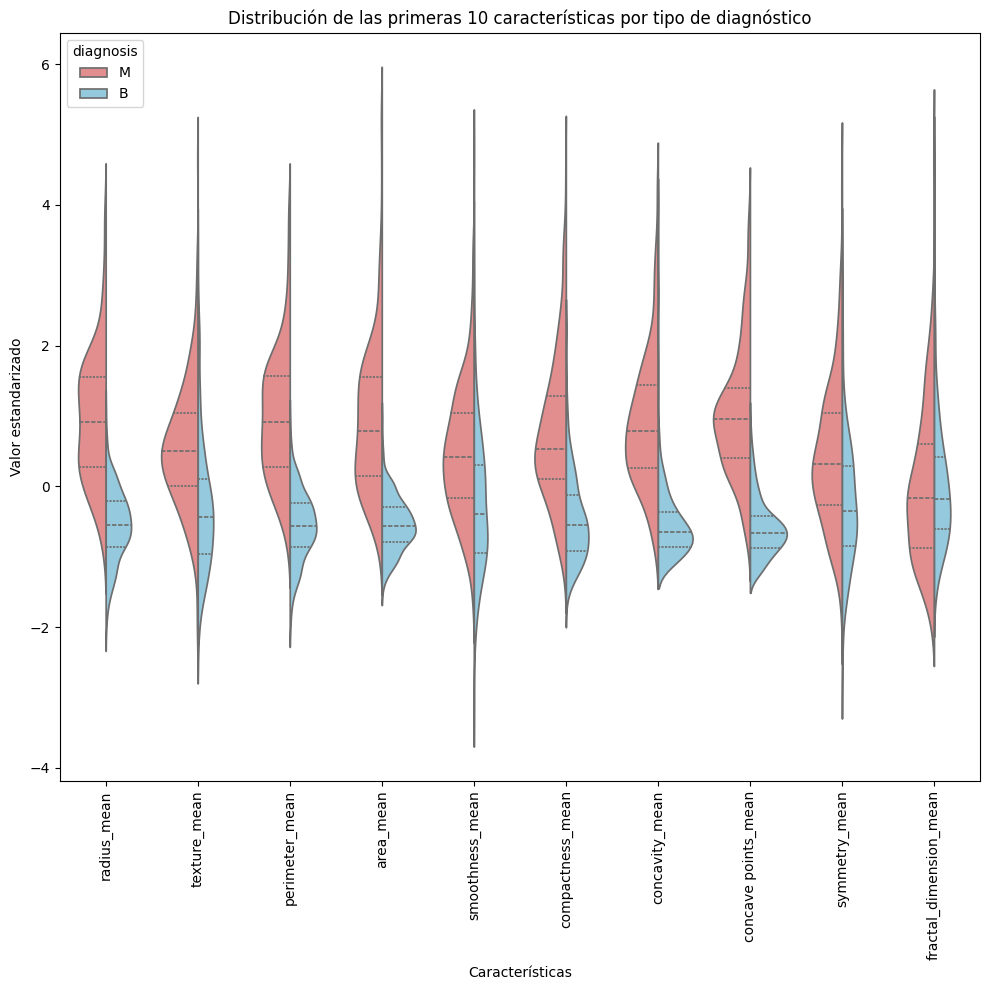

In [9]:
# Seleccionamos el vector de clases (diagnosis) y las características originales
data_dia = y
data = x

# Estandarización de los datos: (valor - media) / desviación estándar
# Esto es útil para comparar características con diferentes escalas
data_n_2 = (data - data.mean()) / (data.std())

# Unimos la columna 'diagnosis' con las primeras 10 características estandarizadas
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)

# Reorganizamos los datos en formato largo para facilitar la visualización con seaborn
data = pd.melt(data,
               id_vars="diagnosis",
               var_name="features",
               value_name="value")

# Creamos un gráfico de violín para observar la distribución de cada característica
plt.figure(figsize=(10, 10))
sns.violinplot(x="features",
               y="value",
               hue="diagnosis",
               data=data,
               split=True,
               inner="quart",
               palette= colores)

# Rotamos etiquetas del eje X para mejor visualización
plt.xticks(rotation=90)
plt.title("Distribución de las primeras 10 características por tipo de diagnóstico")
plt.ylabel("Valor estandarizado")
plt.xlabel("Características")
plt.tight_layout()
plt.show()

Este gráfico muestra cómo se distribuyen los valores de cada característica (Valores X) en función del diagnóstico (benigno o maligno [O valores y]), ayudando a identificar qué variables podrían separar mejor las clases.

***Cuando las distribuciones de los valores son muy similares entre clases, esa característica probablemente tenga bajo poder discriminativo, ya que no ayuda a diferenciar entre tumores benignos y malignos.***

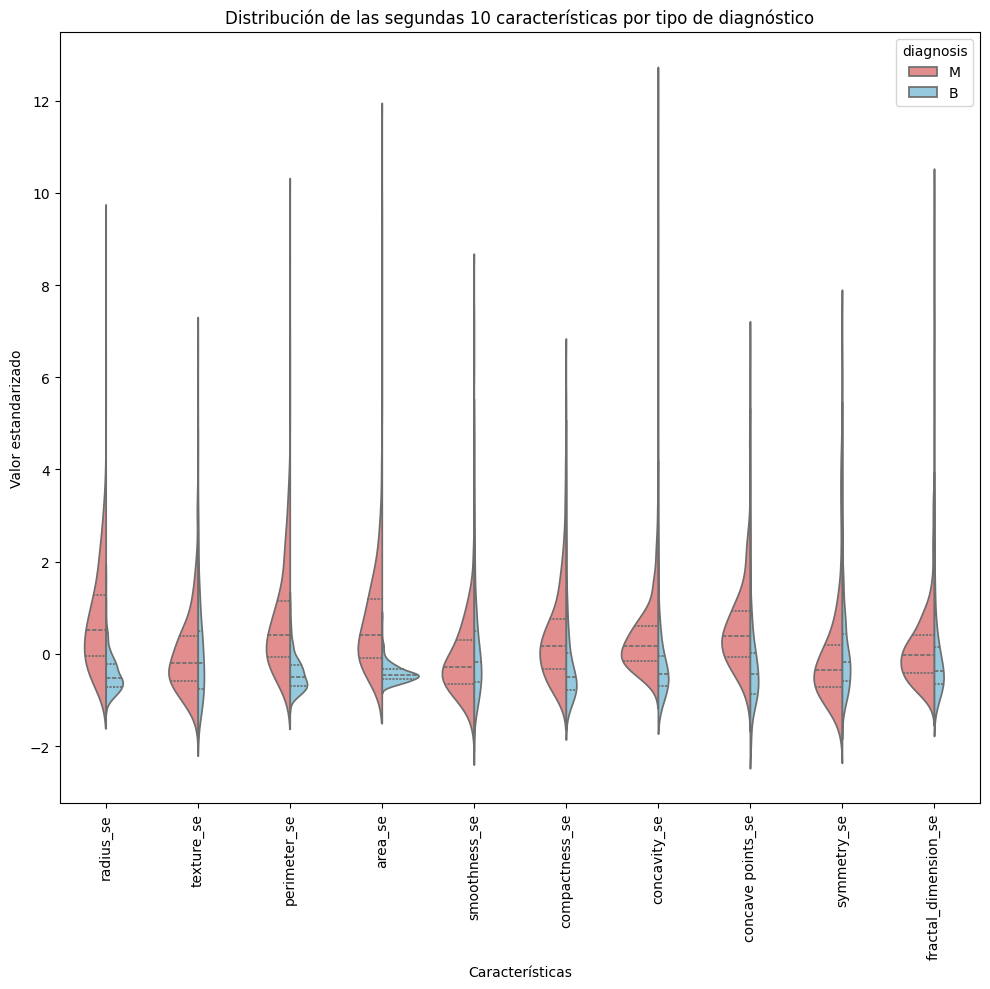

In [10]:
# Segundo grupo de 10 características.
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,
               id_vars="diagnosis",
               var_name="features",
               value_name="value")

# Creamos un gráfico de violín para observar la distribución de cada característica
plt.figure(figsize=(10, 10))
sns.violinplot(x="features",
               y="value",
               hue="diagnosis",
               data=data,
               split=True,
               inner="quart",
               palette= colores)

# Rotamos etiquetas del eje X para mejor visualización
plt.xticks(rotation=90)
plt.title("Distribución de las segundas 10 características por tipo de diagnóstico")
plt.ylabel("Valor estandarizado")
plt.xlabel("Características")
plt.tight_layout()
plt.show()

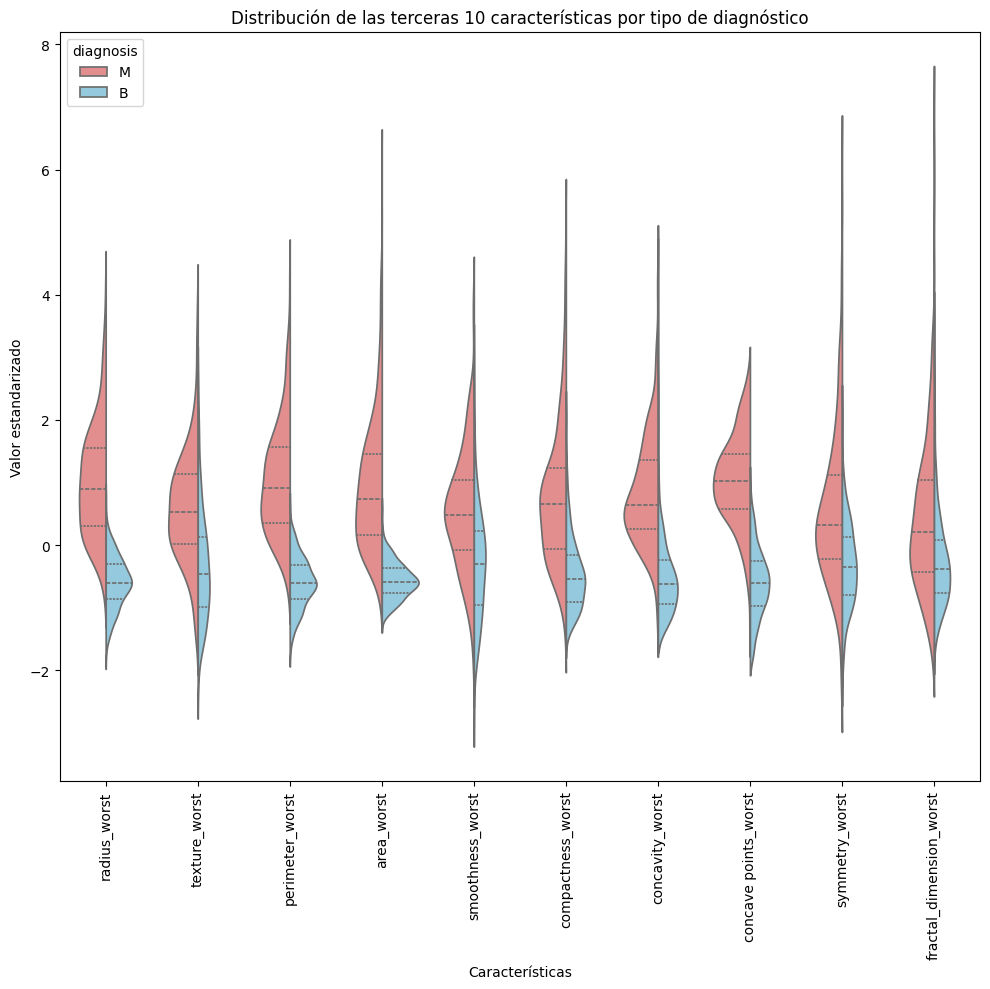

In [11]:
# Tercer grupo de 10 características.
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,
               id_vars="diagnosis",
               var_name="features",
               value_name="value")

# Creamos un gráfico de violín para observar la distribución de cada característica
plt.figure(figsize=(10, 10))
sns.violinplot(x="features",
               y="value",
               hue="diagnosis",
               data=data,
               split=True,
               inner="quart",
               palette= colores)

# Rotamos etiquetas del eje X para mejor visualización
plt.xticks(rotation=90)
plt.title("Distribución de las terceras 10 características por tipo de diagnóstico")
plt.ylabel("Valor estandarizado")
plt.xlabel("Características")
plt.tight_layout()
plt.show()

## ***Relación entre variables***

Aunque algunas variables pueden parecer similares visualmente (como `concavity_worst` y `concave points_worst`), es importante verificar si realmente están correlacionadas. 

Para ello, se utiliza un gráfico conjunto (*joint plot*) que permite observar la relación entre ambas variables. 


Coeficiente de correlación de Pearson: 0.86


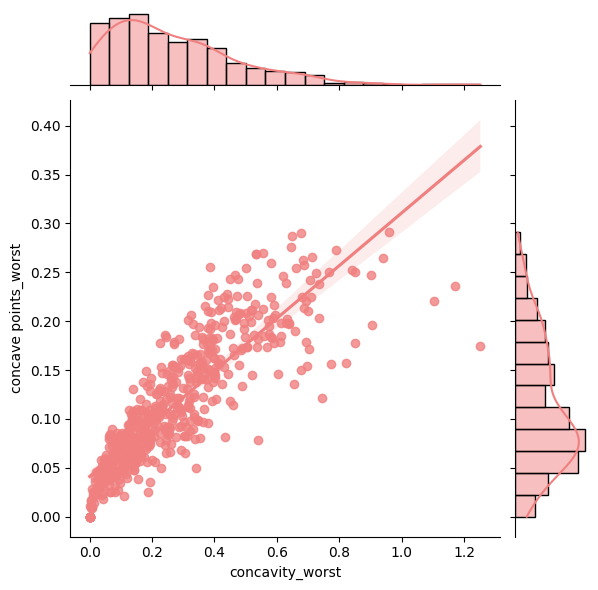

In [12]:
from scipy.stats import pearsonr

# Calculamos el coeficiente de correlación de Pearson
corr_value, _ = pearsonr(x["concavity_worst"], x["concave points_worst"])
print(f"Coeficiente de correlación de Pearson: {corr_value:.2f}")

sns.jointplot(data=x, 
              x="concavity_worst", 
              y="concave points_worst", 
              kind="reg", 
              color="lightcoral")


En este caso, el coeficiente de correlación de Pearson es **0.86**, lo que indica una correlación fuerte.

Esto sugiere que podrían estar transmitiendo información redundante. Aun así, **no estamos seleccionando variables todavía**, solo explorando las relaciones para tener una mejor comprensión del comportamiento de los datos.


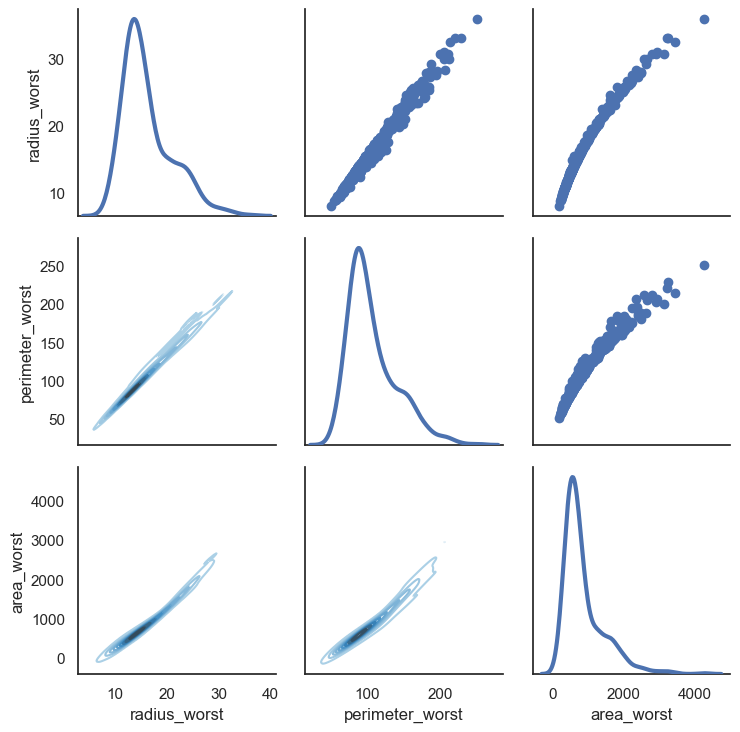

In [13]:
# Configuramos el estilo visual de Seaborn para que tenga fondo blanco y aspecto limpio
sns.set(style="white")

# Seleccionamos tres variables para analizar visualmente sus relaciones
df = x.loc[:, ['radius_worst', 'perimeter_worst', 'area_worst']]

# Creamos una cuadrícula de gráficos (PairGrid) para visualizar todas las combinaciones posibles entre las tres variables
# diag_sharey=False evita que los histogramas diagonales compartan el mismo eje Y, lo que mejora su visibilidad
g = sns.PairGrid(df, diag_sharey=False)

# En la parte inferior de la matriz, mostramos la densidad conjunta entre pares de variables usando kdeplot
g.map_lower(sns.kdeplot, cmap="Blues_d")

# En la parte superior, mostramos diagramas de dispersión entre pares de variables
g.map_upper(plt.scatter)

# En la diagonal, graficamos la densidad de cada variable individualmente (distribución univariada)
g.map_diag(sns.kdeplot, lw=3)

## ***Análisis de relaciones entre variables con PairGrid***

En esta sección analizamos visualmente la relación entre tres variables clave: `radius_worst`, `perimeter_worst` y `area_worst`.

Utilizamos un gráfico de tipo `PairGrid`, que nos permite observar:

- En la **diagonal**, la distribución individual de cada variable mediante curvas de densidad (*kdeplots*).
- En la **parte inferior**, la densidad conjunta entre pares de variables, lo cual es útil para identificar relaciones no lineales.
- En la **parte superior**, diagramas de dispersión que permiten visualizar tendencias lineales o agrupamientos.

Este tipo de análisis facilita la detección de **correlaciones fuertes** y **posible redundancia entre variables**.

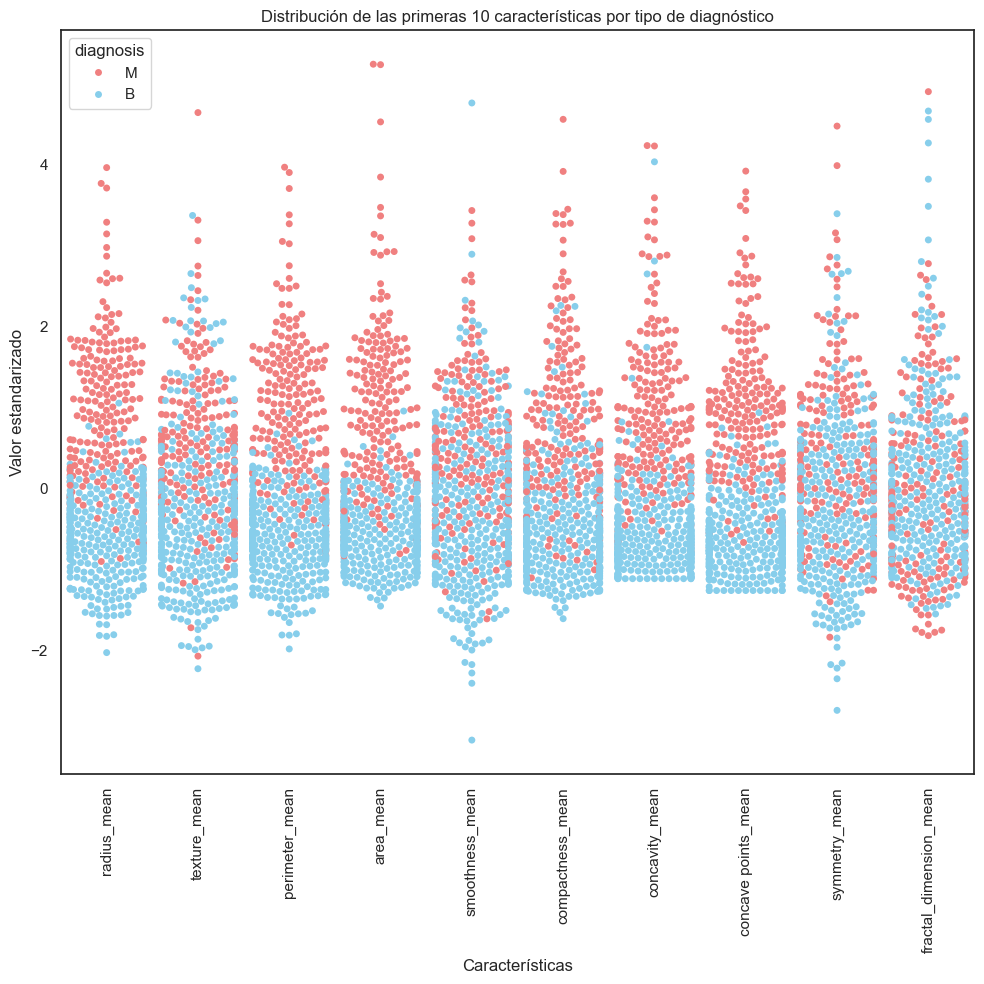

In [ ]:
# Seleccionamos el vector de clases (diagnosis) y las características originales
data_dia = y
data = x

# Estandarización de los datos: (valor - media) / desviación estándar
# Esto es útil para comparar características con diferentes escalas
data_n_2 = (data - data.mean()) / (data.std())

# Unimos la columna 'diagnosis' con las primeras 10 características estandarizadas
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)

# Reorganizamos los datos en formato largo para facilitar la visualización con seaborn
data = pd.melt(data,
               id_vars="diagnosis",
               var_name="features",
               value_name="value")

# Creamos un gráfico de swarmplot para observar la distribución de cada característica
plt.figure(figsize=(10, 10))
sns.swarmplot(x="features",
               y="value",
               hue="diagnosis",
               data=data,
               palette= colores)

# Rotamos etiquetas del eje X para mejor visualización
plt.xticks(rotation=90)
plt.title("Distribución de las primeras 10 características por tipo de diagnóstico")
plt.ylabel("Valor estandarizado")
plt.xlabel("Características")
plt.tight_layout()
plt.show()

### ***Observaciones del gráfico Swarmplot***

Este gráfico muestra cómo se distribuye cada característica respecto al diagnóstico (maligno o benigno).

Si los puntos de una clase se agrupan claramente en una zona distinta a la otra, la característica tiene buen poder discriminativo.

En cambio, si ambas clases se mezclan de forma similar, esa característica podría tener menor utilidad para predecir el diagnóstico.




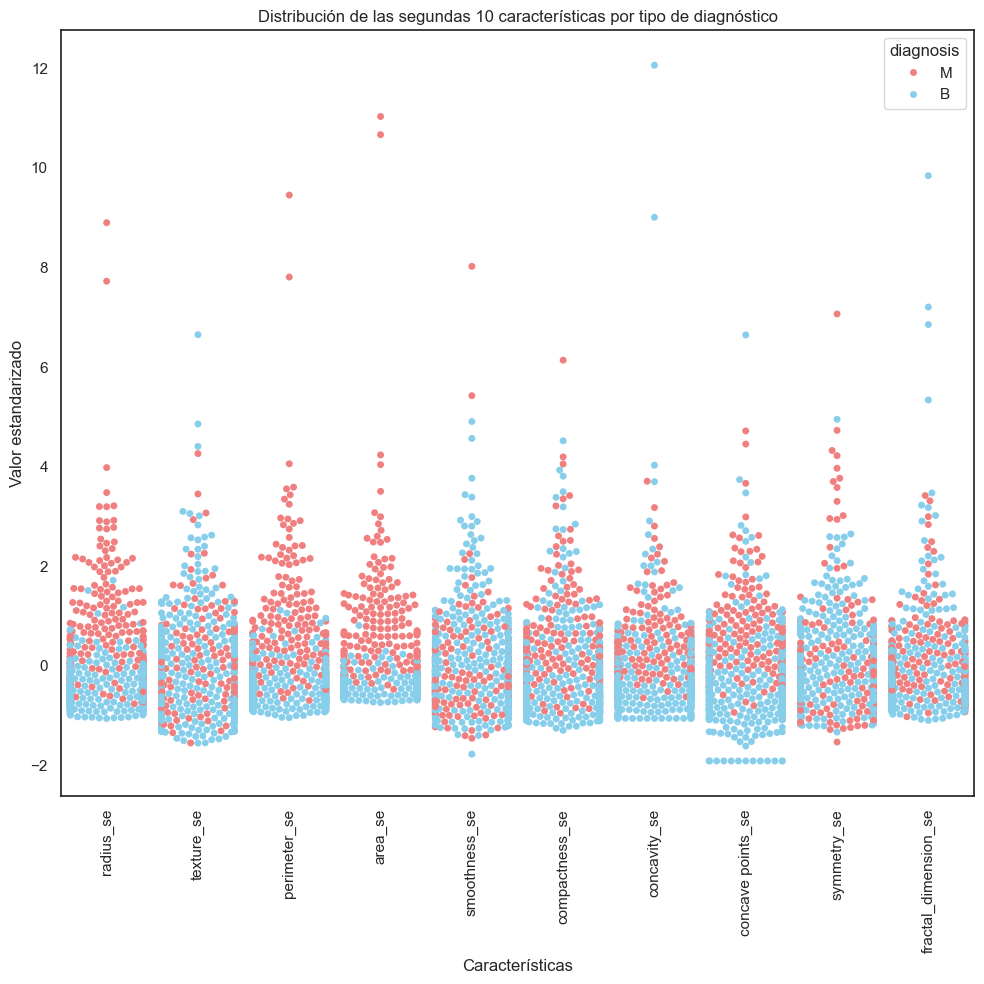

In [15]:
# Segundo grupo de 10 características.
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,
               id_vars="diagnosis",
               var_name="features",
               value_name="value")

# Creamos un gráfico de swarmplot para observar la distribución de cada característica
plt.figure(figsize=(10, 10))
sns.swarmplot(x="features",
               y="value",
               hue="diagnosis",
               data=data,
               palette= colores)

# Rotamos etiquetas del eje X para mejor visualización
plt.xticks(rotation=90)
plt.title("Distribución de las segundas 10 características por tipo de diagnóstico")
plt.ylabel("Valor estandarizado")
plt.xlabel("Características")
plt.tight_layout()
plt.show()

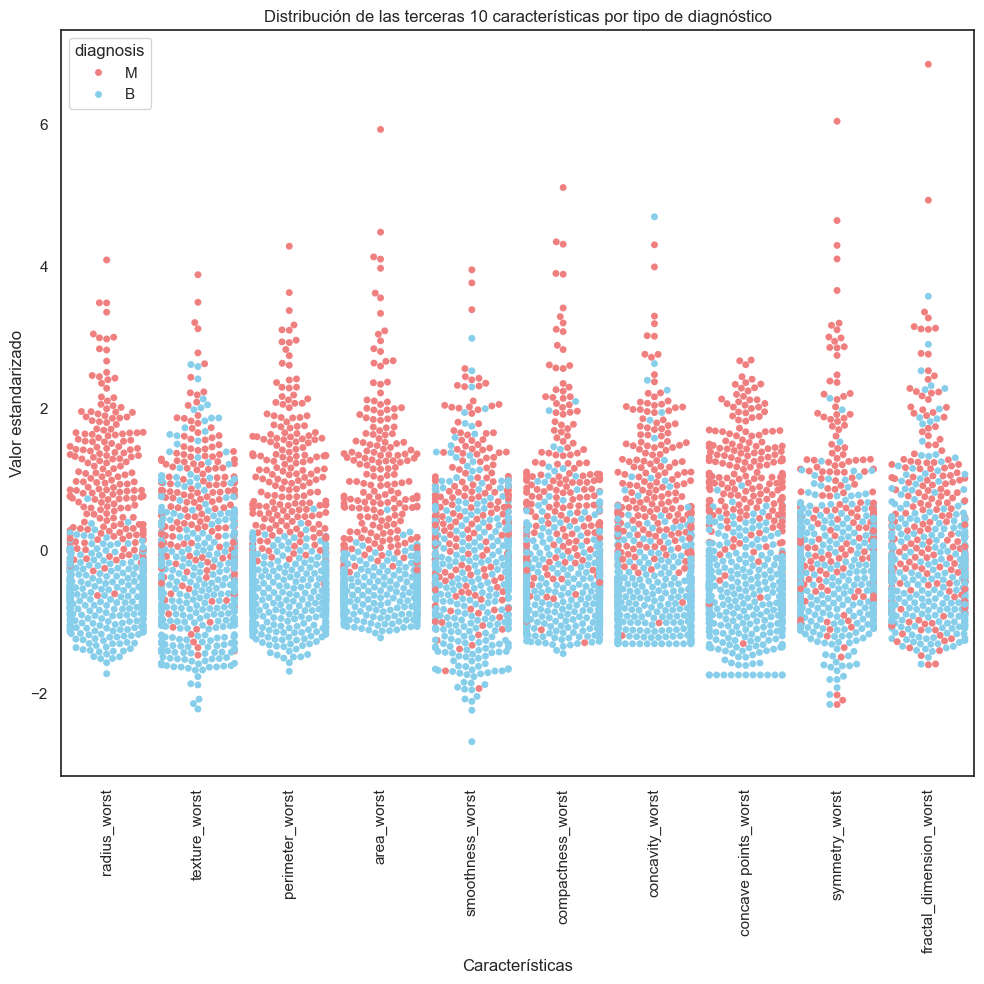

In [16]:
# Tercer grupo de 10 características.
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,
               id_vars="diagnosis",
               var_name="features",
               value_name="value")

# Creamos un gráfico de swarmplot para observar la distribución de cada característica
plt.figure(figsize=(10, 10))
sns.swarmplot(x="features",
               y="value",
               hue="diagnosis",
               data=data,
               palette= colores)

# Rotamos etiquetas del eje X para mejor visualización
plt.xticks(rotation=90)
plt.title("Distribución de las terceras 10 características por tipo de diagnóstico")
plt.ylabel("Valor estandarizado")
plt.xlabel("Características")
plt.tight_layout()
plt.show()

### ***Observación comparativa***

Al analizar los gráficos, algunas características muestran mejor capacidad de separación entre clases. Por ejemplo, `area_worst`, incluso, `radius_worst` presenta una distinción clara entre casos benignos y malignos, lo cual sugiere un alto valor predictivo.

En contraste, características como `smoothness_se` muestran una gran superposición entre clases, lo que indica una baja capacidad discriminativa.


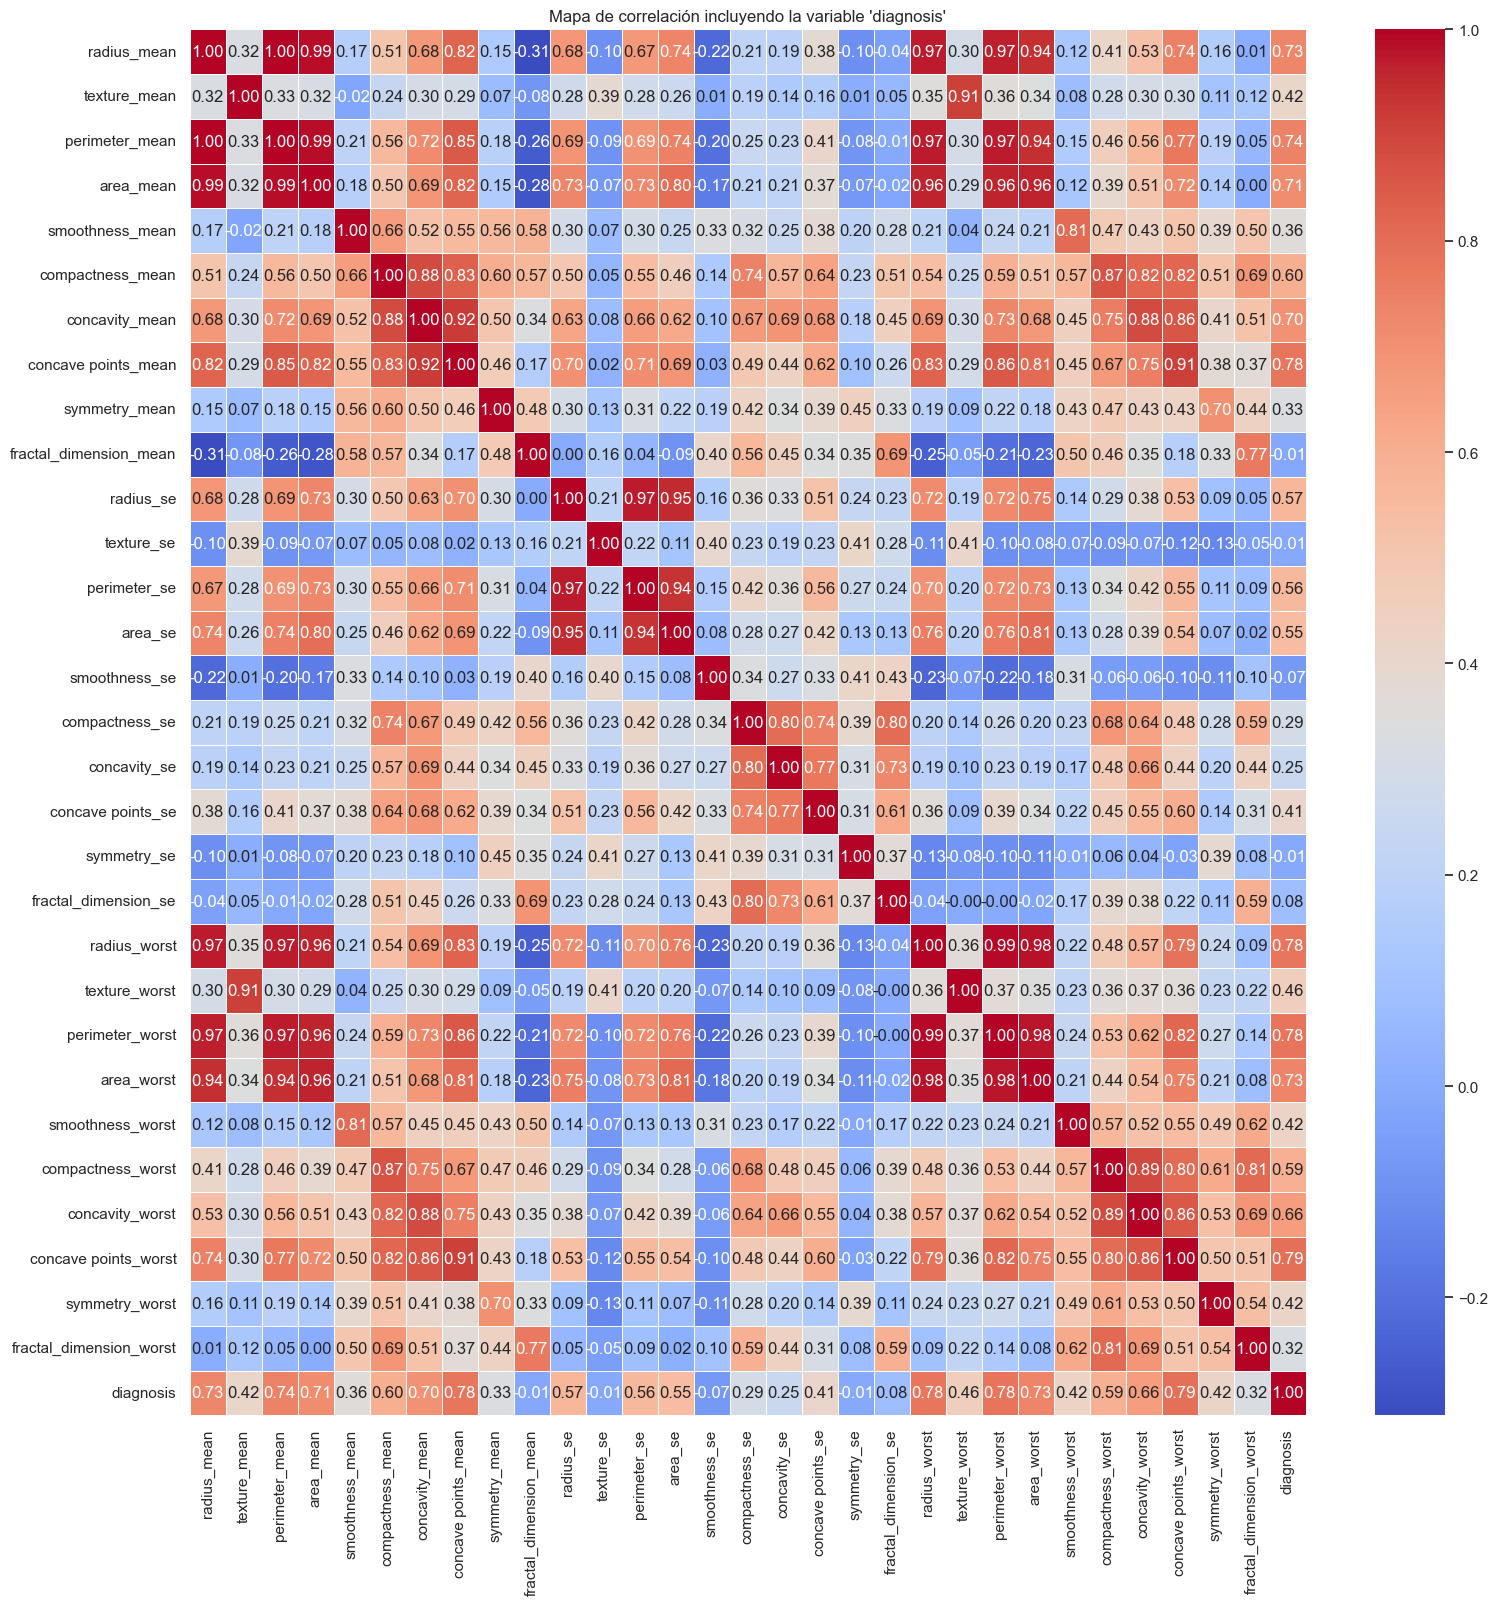

In [ ]:
# Convertimos la variable 'diagnosis' a valores numéricos: M = 1 (maligno), B = 0 (benigno)
data_corr = x.copy()

# y es una Serie con valores 'M' o 'B'
# map transforma esos valores según el diccionario proporcionado:
# 'M' → 1 (maligno), 'B' → 0 (benigno)
data_corr['diagnosis'] = y.map({'M': 1, 'B': 0})

# Creamos el mapa de calor con todas las características incluyendo 'diagnosis'
plt.figure(figsize=(18, 18))
sns.heatmap(data_corr.corr(), annot=True, linewidths=0.5, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de correlación incluyendo la variable 'diagnosis'")
plt.show()


### ***Correlación con la variable objetivo***

En este heatmap se incluye la variable `diagnosis` convertida a valores numéricos (maligno = 1, benigno = 0). Esto permite observar qué características están más relacionadas con el diagnóstico.

Las variables con alta correlación positiva están más asociadas a casos malignos, mientras que una correlación negativa sugiere asociación con tumores benignos.


> *Nota:* Se codificó la variable `diagnosis` como 1 = Maligno y 0 = Benigno, por lo tanto:
> - Correlaciones positivas indican relación con tumores malignos.
> - Correlaciones negativas indican relación con tumores benignos.